With Libraries

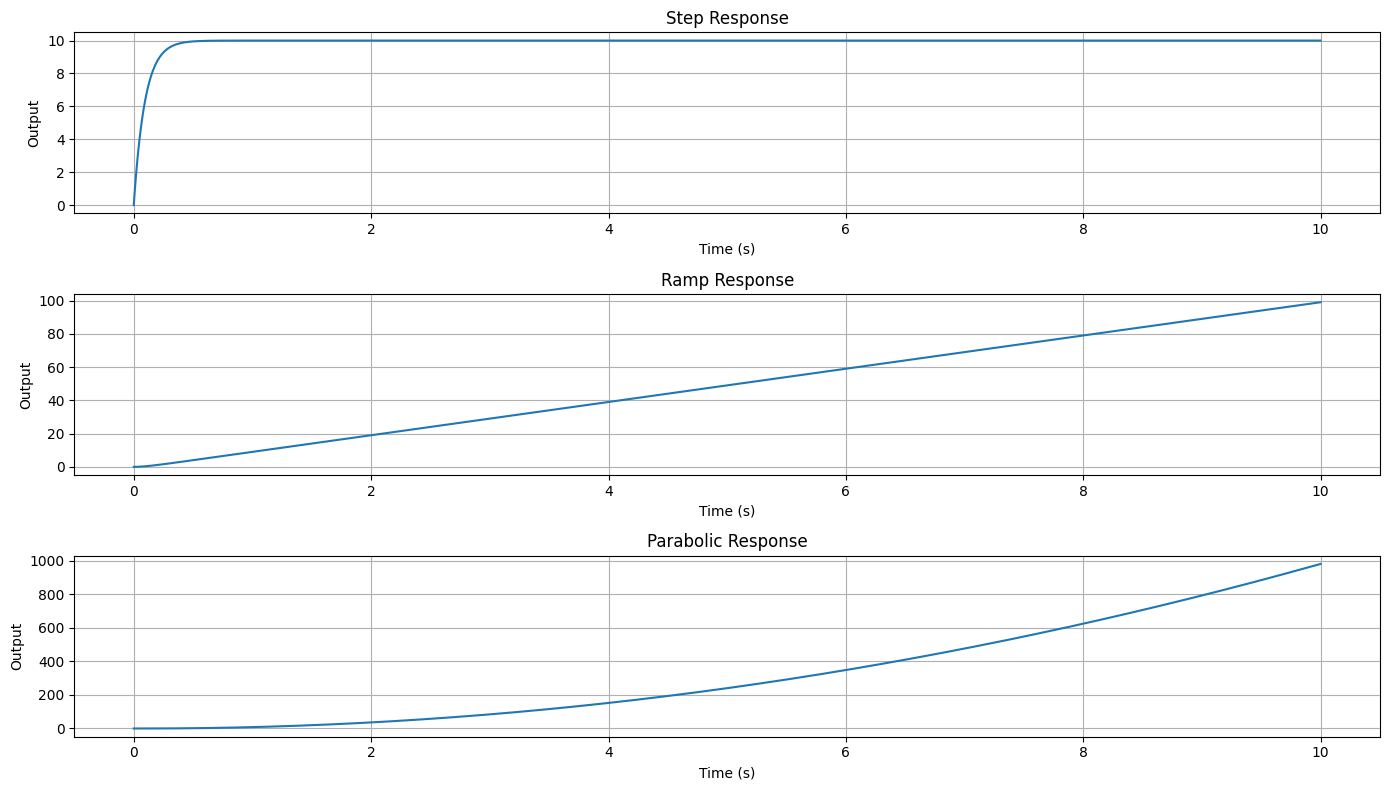

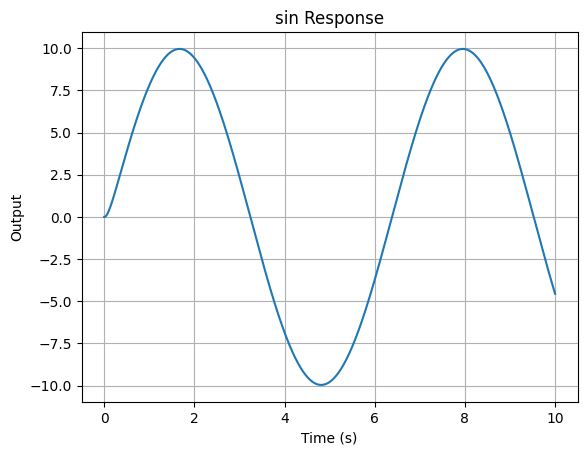

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import dlti, dlsim

# Define the open-loop function G(z)
def openloop(z):
    return 1 / (z - 0.9)

# Define the controller D(z)
def controller(z):
    return (z - 1)**3 / (z - 0.9)

# Define the closed-loop transfer function
def closed_loop(z):
    G = openloop(z)
    D = controller(z)
    return D * G / (1 + D * G)

# Simulate the response for a given input signal
def simulate_response(system, input_signal, ts):
    _, y = dlsim(system, input_signal, t=ts)
    return y

# Define the time steps and inputs
stepsize = 1000
start = 0
stop = 10
ts = np.linspace(start, stop, stepsize)
sin_inp=np.sin(ts)
step_inp = np.ones(stepsize)
ramp_inp = ts
parabolic_inp = ts**2

# Define the system for simulation (discrete-time transfer function)
system_step = dlti([1], [1, -0.9], dt=ts[1] - ts[0])
system_ramp = dlti([1], [1, -0.9], dt=ts[1] - ts[0])
system_parabolic = dlti([1], [1, -0.9], dt=ts[1] - ts[0])

# Simulate the responses
step_output = simulate_response(system_step, step_inp, ts)
ramp_output = simulate_response(system_ramp, ramp_inp, ts)
parabolic_output = simulate_response(system_parabolic, parabolic_inp, ts)
sinout = simulate_response(system_parabolic, sin_inp, ts)

# Plot the results
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.plot(ts, step_output, label='Step Response')
plt.title('Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(ts, ramp_output, label='Ramp Response')
plt.title('Ramp Response')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(ts, parabolic_output, label='Parabolic Response')
plt.title('Parabolic Response')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()

plt.tight_layout()
plt.figure()
plt.plot(ts, sinout, label='sin Response')
plt.title('sin Response')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()

plt.show()


A,B)

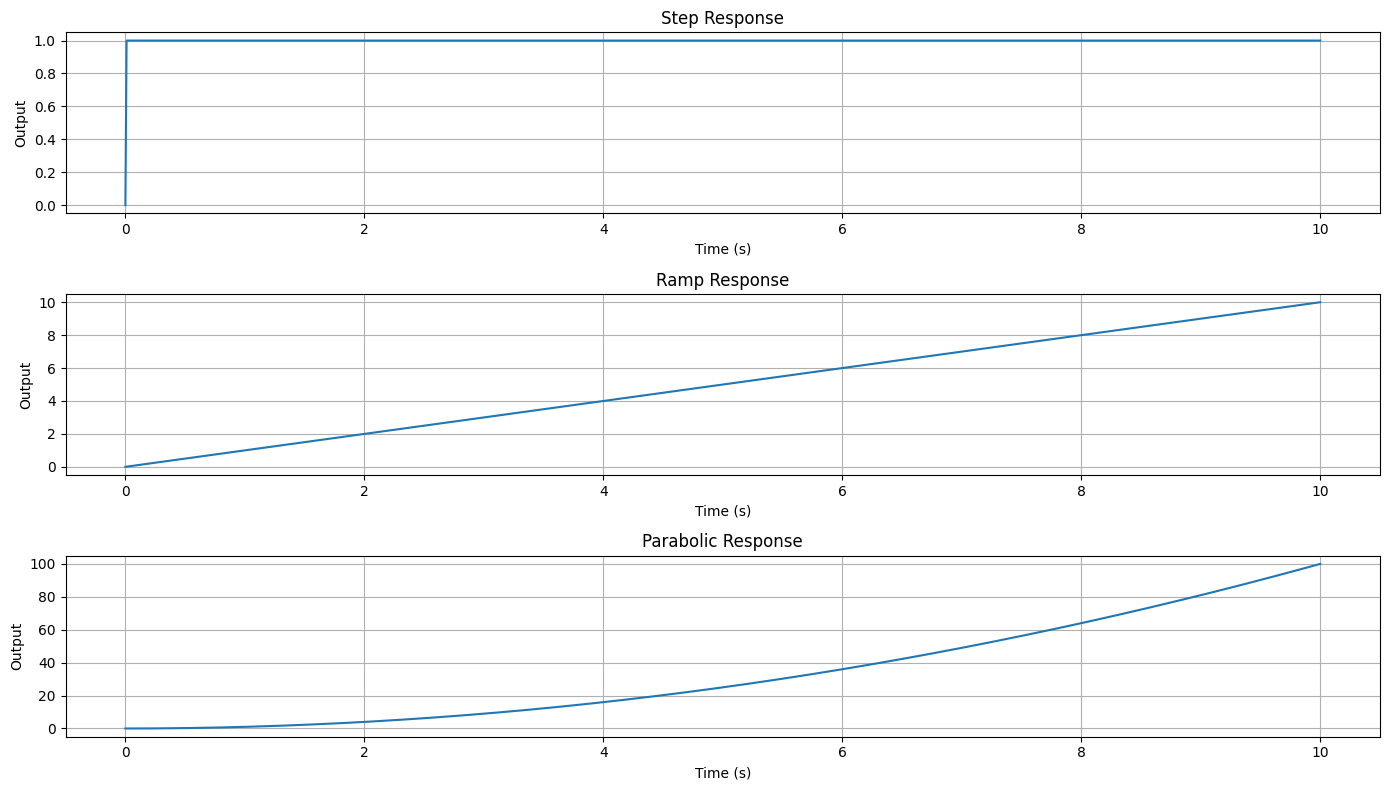

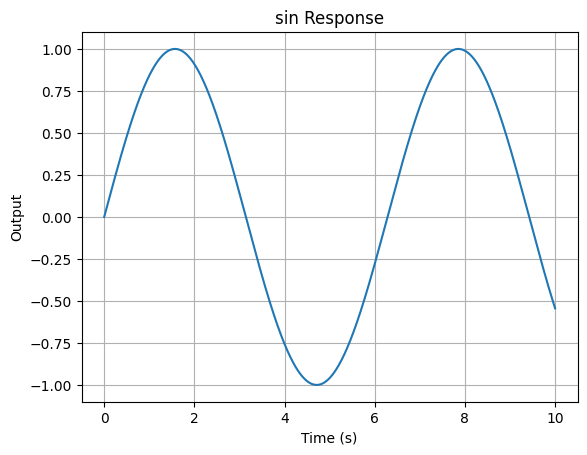

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Define the open-loop function G(z)
def openloop(z):
    return 1 / (z - 0.9)

# Define the controller D(z)
def controller(z):
    return (z - 1)**3 / z**3

# Define the closed-loop transfer function
def closed_loop(z):
    G = openloop(z)
    D = controller(z)
    return D * G / (1 + D * G)

# Simulate the response using the closed-loop transfer function
def simulate_response(system_func, input_signal, ts):
    z = np.exp(1j * np.linspace(0, np.pi, len(input_signal)))
    H = system_func(z)
    
    # Extract real part (magnitude response) for simplicity
    a = np.abs(H[0])
    
    output_signal = np.zeros_like(input_signal)
    for n in range(1, len(input_signal)):
        output_signal[n] = a * output_signal[n-1] + (1 - a) * input_signal[n]
    return output_signal

# Define the time steps and inputs
stepsize = 1000
start = 0
stop = 10
ts = np.linspace(start, stop, stepsize)
step_inp = np.ones(stepsize)
sin_inp=np.sin(ts)
ramp_inp = ts
parabolic_inp = ts**2

# Compute the closed-loop transfer function
def closed_loop_response(z):
    return closed_loop(z)

# Simulate the responses
step_output = simulate_response(closed_loop_response, step_inp, ts)
ramp_output = simulate_response(closed_loop_response, ramp_inp, ts)
parabolic_output = simulate_response(closed_loop_response, parabolic_inp, ts)
sinout = simulate_response(closed_loop_response, sin_inp, ts)

# Plot the results
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.plot(ts, step_output, label='Step Response')
plt.title('Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(ts, ramp_output, label='Ramp Response')
plt.title('Ramp Response')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(ts, parabolic_output, label='Parabolic Response')
plt.title('Parabolic Response')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()

plt.tight_layout()
plt.figure()
plt.plot(ts, sinout, label='sin Response')
plt.title('sin Response')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()
plt.show()


C)

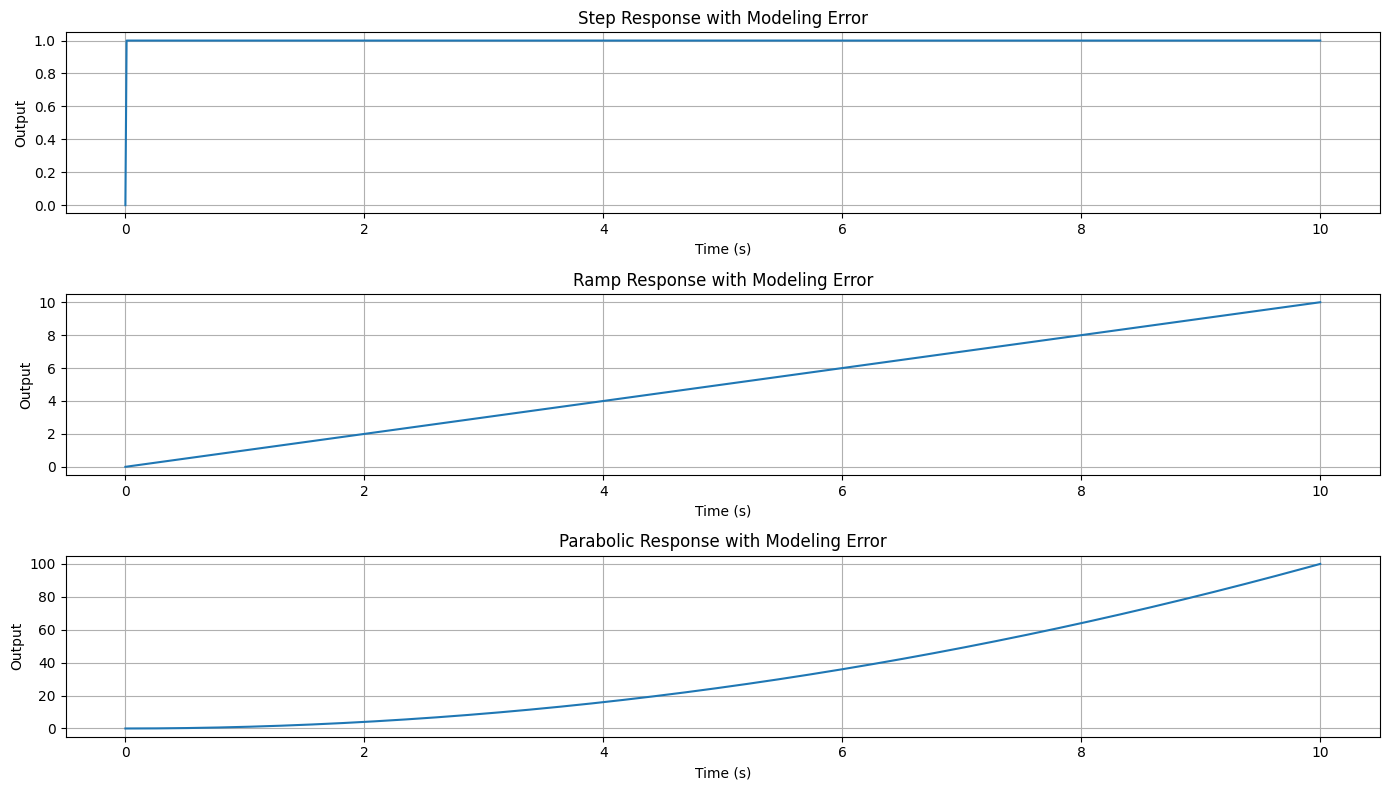

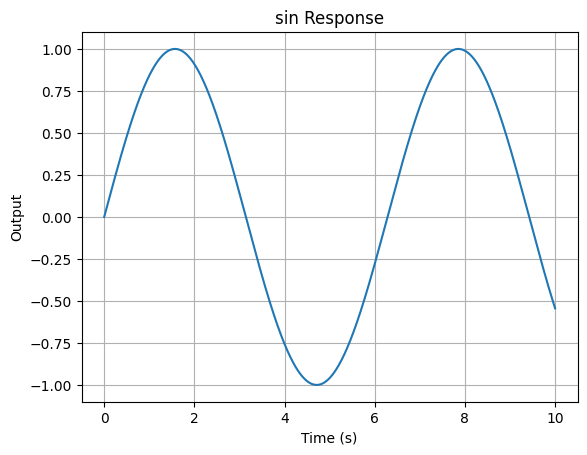

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define the real open-loop function G_real(z)
def openloop_real(z, k):
    delta_p = 0.1 * np.sin((2 * np.pi / 50) * k)
    return 1 / (z - (0.9 + delta_p))

# Define the controller D(z)
def controller(z):
    return (z - 1)**3 / z**3

# Define the closed-loop transfer function with modeling error
def closed_loop_real(z, k):
    G_real = openloop_real(z, k)
    D = controller(z)
    return D * G_real / (1 + D * G_real)

# Simulate the response using the closed-loop transfer function with modeling error
def simulate_response_real(input_signal, ts):
    output_signal = np.zeros_like(input_signal)
    for n in range(1, len(input_signal)):
        z = np.exp(1j * np.linspace(0, np.pi, len(input_signal)))
        H = closed_loop_real(z, n)
        
        # Extract real part (magnitude response) for simplicity
        a = np.abs(H[0])
        
        output_signal[n] = a * output_signal[n-1] + (1 - a) * input_signal[n]
    return output_signal

# Define the time steps and inputs
stepsize = 1000
start = 0
stop = 10
ts = np.linspace(start, stop, stepsize)
step_inp = np.ones(stepsize)
ramp_inp = ts
sin_inp=np.sin(ts)
parabolic_inp = ts**2

# Simulate the responses with modeling error
step_output_real = simulate_response_real(step_inp, ts)
ramp_output_real = simulate_response_real(ramp_inp, ts)
parabolic_output_real = simulate_response_real(parabolic_inp, ts)
sinout = simulate_response_real(sin_inp, ts)

# Plot the results
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.plot(ts, step_output_real, label='Step Response')
plt.title('Step Response with Modeling Error')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(ts, ramp_output_real, label='Ramp Response')
plt.title('Ramp Response with Modeling Error')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(ts, parabolic_output_real, label='Parabolic Response')
plt.title('Parabolic Response with Modeling Error')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()

plt.tight_layout()
plt.figure()
plt.plot(ts, sinout, label='sin Response')
plt.title('sin Response')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()
plt.show()


D)

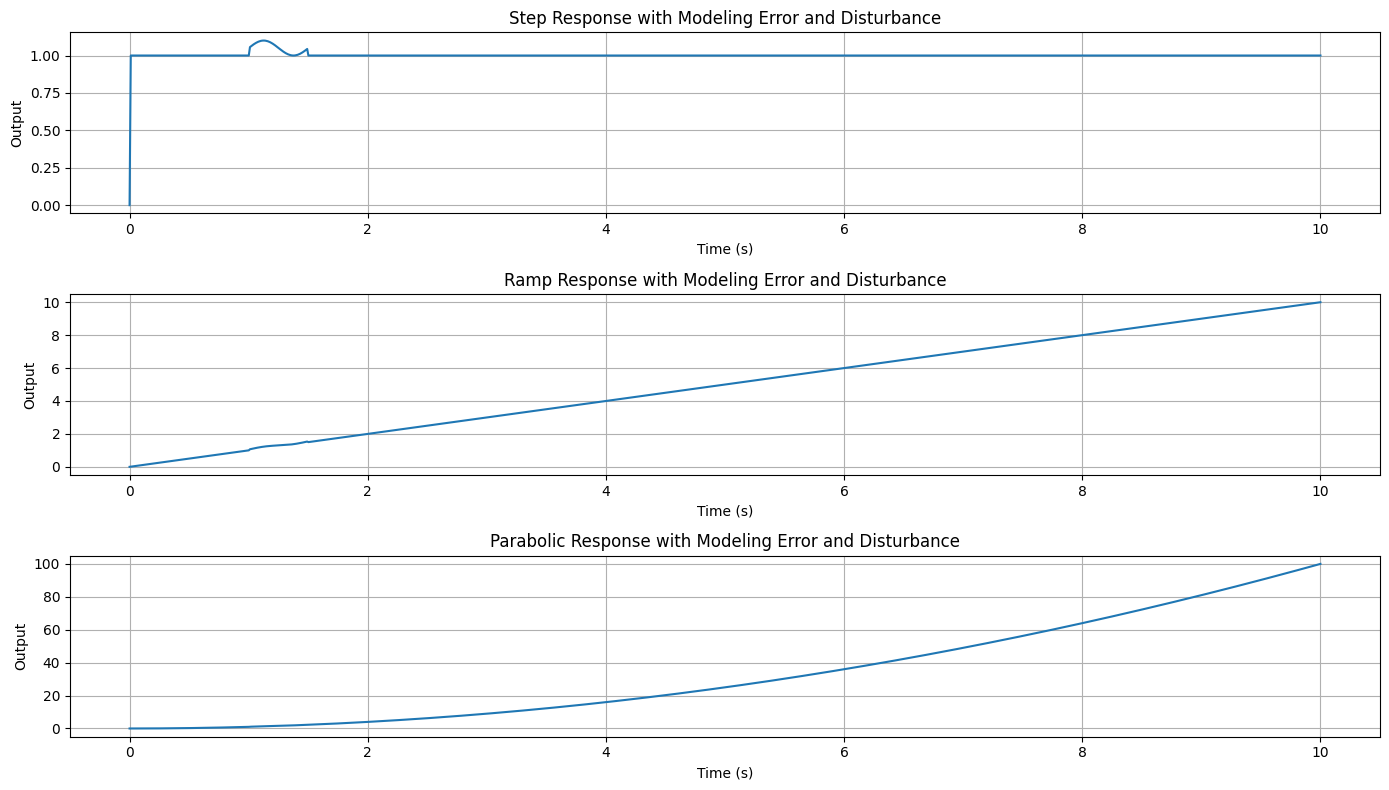

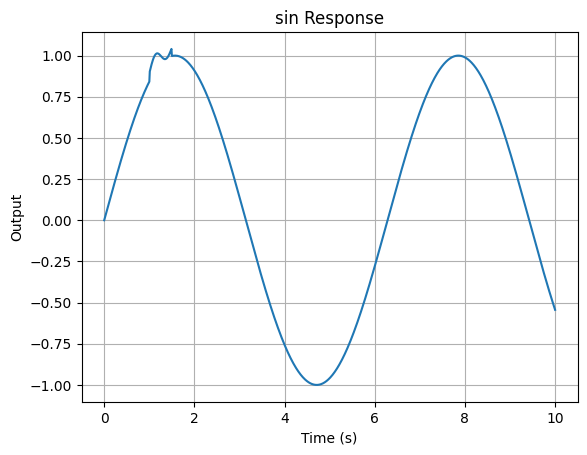

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Define the real open-loop function G_real(z)
def openloop_real(z, k):
    delta_p = 0.1 * np.sin((2 * np.pi / 50) * k)
    return 1 / (z - (0.9 + delta_p))

# Define the controller D(z)
def controller(z):
    return (z - 1)**3 / z**3

# Define the closed-loop transfer function with modeling error
def closed_loop_real(z, k):
    G_real = openloop_real(z, k)
    D = controller(z)
    return D * G_real / (1 + D * G_real)

# Define the disturbance function
def disturbance(k):
    return 0.05 + 0.05 * np.sin((2 * np.pi / 50) * k)

# Simulate the response using the closed-loop transfer function with modeling error and disturbance
def simulate_response_real_with_disturbance(input_signal, ts):
    output_signal = np.zeros_like(input_signal)
    for n in range(1, len(input_signal)):
        z = np.exp(1j * np.linspace(0, np.pi, len(input_signal)))
        H = closed_loop_real(z, n)
        
        # Extract real part (magnitude response) for simplicity
        a = np.abs(H[0])
        
        if 150>n> 100:
            d = disturbance(n)
        else:
            d=0
        output_signal[n] = a * output_signal[n-1] + (1 - a) * (input_signal[n] + d)
    return output_signal

# Define the time steps and inputs
stepsize = 1000
start = 0
stop = 10
ts = np.linspace(start, stop, stepsize)
step_inp = np.ones(stepsize)
ramp_inp = ts
parabolic_inp = ts**2
sin_inp=np.sin(ts)

# Simulate the responses with modeling error and disturbance
step_output_real_disturbance = simulate_response_real_with_disturbance(step_inp, ts)
ramp_output_real_disturbance = simulate_response_real_with_disturbance(ramp_inp, ts)
parabolic_output_real_disturbance = simulate_response_real_with_disturbance(parabolic_inp, ts)
sinout = simulate_response_real_with_disturbance(sin_inp, ts)


# Plot the results
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.plot(ts, step_output_real_disturbance, label='Step Response')
plt.title('Step Response with Modeling Error and Disturbance')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(ts, ramp_output_real_disturbance, label='Ramp Response')
plt.title('Ramp Response with Modeling Error and Disturbance')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(ts, parabolic_output_real_disturbance, label='Parabolic Response')
plt.title('Parabolic Response with Modeling Error and Disturbance')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()

plt.tight_layout()
plt.figure()
plt.plot(ts, sinout, label='sin Response')
plt.title('sin Response')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()
plt.show()


E)

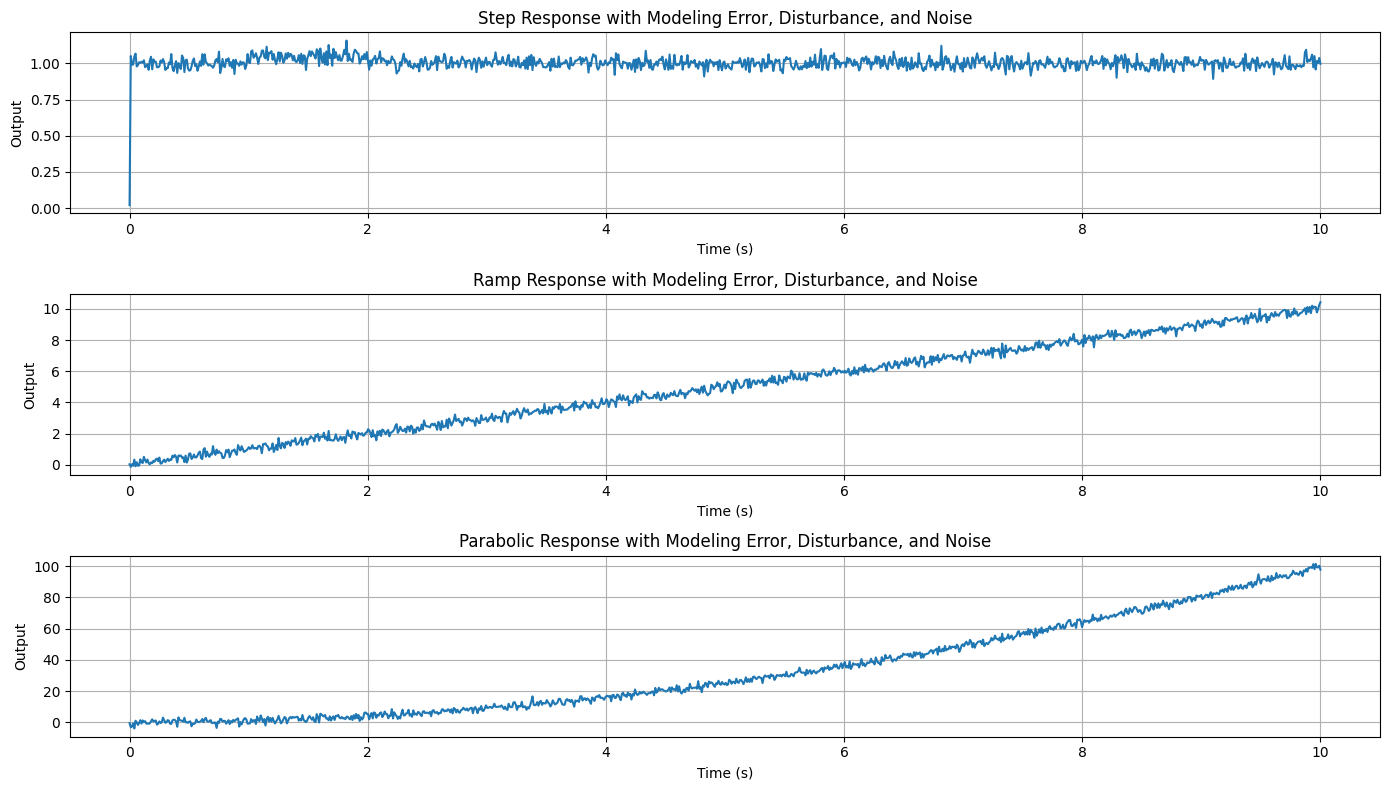

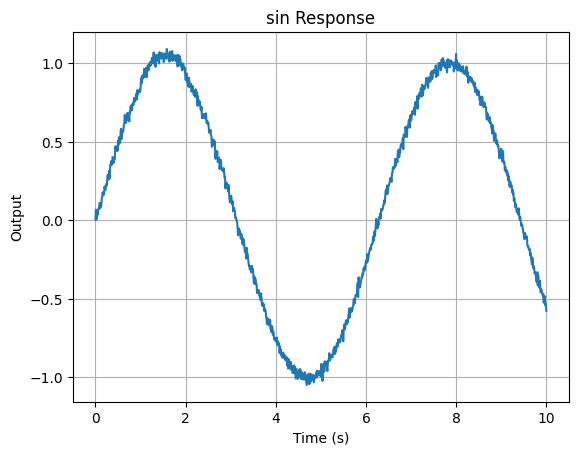

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define the real open-loop function G_real(z)
def openloop_real(z, k):
    delta_p = 0.1 * np.sin((2 * np.pi / 50) * k)
    return 1 / (z - (0.9 + delta_p))

# Define the controller D(z)
def controller(z):
    return (z - 1)**3 / z**3

# Define the closed-loop transfer function with modeling error
def closed_loop_real(z, k):
    G_real = openloop_real(z, k)
    D = controller(z)
    return D * G_real / (1 + D * G_real)

# Define the disturbance function
def disturbance(k):
    return 0.05 + 0.05 * np.sin((2 * np.pi / 50) * k)

# Function to add AWGN noise
def add_awgn_noise(signal, snr_db):
    snr_linear = 10**(snr_db / 10.0)
    signal_power = np.mean(signal**2)
    noise_power = signal_power / snr_linear
    noise = np.sqrt(noise_power) * np.random.normal(size=signal.shape)
    return signal + noise

# Simulate the response using the closed-loop transfer function with modeling error and disturbance
def simulate_response_real_with_disturbance_and_noise(input_signal, ts, snr_db):
    output_signal = np.zeros_like(input_signal)
    for n in range(1, len(input_signal)):
        z = np.exp(1j * np.linspace(0, np.pi, len(input_signal)))
        H = closed_loop_real(z, n)
        
        # Extract real part (magnitude response) for simplicity
        a = np.abs(H[0])
        
        if 200>n> 100:
            d = disturbance(800)
        else:
            d=0
        output_signal[n] = a * output_signal[n-1] + (1 - a) * (input_signal[n] + d)
    
    output_signal_noisy = add_awgn_noise(output_signal, snr_db)
    return output_signal_noisy

# Define the time steps and inputs
stepsize = 1000
start = 0
stop = 10
ts = np.linspace(start, stop, stepsize)
step_inp = np.ones(stepsize)
ramp_inp = ts
parabolic_inp = ts**2
sin_inp=np.sin(ts)

# Simulate the responses with modeling error, disturbance, and noise
snr_db = 30  # SNR in dB
step_output_real_disturbance_noise = simulate_response_real_with_disturbance_and_noise(step_inp, ts, snr_db)
ramp_output_real_disturbance_noise = simulate_response_real_with_disturbance_and_noise(ramp_inp, ts, snr_db)
parabolic_output_real_disturbance_noise = simulate_response_real_with_disturbance_and_noise(parabolic_inp, ts, snr_db)
sin_output_real_disturbance_noise = simulate_response_real_with_disturbance_and_noise(sin_inp, ts, snr_db)

# Plot the results
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.plot(ts, step_output_real_disturbance_noise, label='Step Response')
plt.title('Step Response with Modeling Error, Disturbance, and Noise')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(ts, ramp_output_real_disturbance_noise, label='Ramp Response')
plt.title('Ramp Response with Modeling Error, Disturbance, and Noise')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(ts, parabolic_output_real_disturbance_noise, label='Parabolic Response')
plt.title('Parabolic Response with Modeling Error, Disturbance, and Noise')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()

plt.tight_layout()
plt.figure()
plt.plot(ts, sin_output_real_disturbance_noise, label='sin Response')
plt.title('sin Response')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()
plt.show()
